In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sodapy import Socrata

In [4]:
# importing data
#get request using Socrata
client = Socrata("data.cdc.gov", None)
results = client.get("9mfq-cb36", limit=60000)
# putting data into a dataframe
results_df = pd.DataFrame.from_records(results)
results_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death
0,2021-03-11T00:00:00.000,KS,297229,241035.0,56194,0.0,0,4851,0.0,0,2021-03-12T15:20:13.190,Agree,N/A,NaN,NaN
1,2021-12-01T00:00:00.000,ND,163565,135705.0,27860,589.0,220,1907,9.0,0,2021-12-02T14:35:20.922,Agree,Not agree,NaN,NaN
2,2022-01-02T00:00:00.000,AS,11,NaN,NaN,0.0,0,0,0.0,0,2022-01-03T15:18:16.200,NaN,NaN,NaN,NaN
3,2021-11-22T00:00:00.000,AL,841461,620483.0,220978,703.0,357,16377,7.0,3,2021-11-22T00:00:00.000,Agree,Agree,12727.0,3650
4,2022-05-30T00:00:00.000,AK,251425,NaN,NaN,0.0,0,1252,0.0,0,2022-05-31T13:20:20.883,N/A,N/A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2020-02-21T00:00:00.000,CO,0,0.0,0,0.0,0,0,0.0,0,2020-02-21T00:00:00.000,Agree,Agree,0.0,0
59996,2021-09-13T00:00:00.000,NM,241663,NaN,NaN,593.0,0,4618,14.0,0,2021-09-15T00:00:00.000,N/A,Not agree,NaN,NaN
59997,2021-11-14T00:00:00.000,WA,753149,NaN,NaN,1346.0,168,8934,0.0,0,2021-11-14T00:00:00.000,N/A,N/A,NaN,NaN
59998,2022-09-16T00:00:00.000,WA,1800734,NaN,NaN,1320.0,254,14199,15.0,0,2022-09-16T00:00:00.000,N/A,N/A,NaN,NaN


In [5]:
results_df.shape

(60000, 15)

In [6]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  60000 non-null  object
 1   state            60000 non-null  object
 2   tot_cases        60000 non-null  object
 3   conf_cases       34006 non-null  object
 4   prob_cases       33934 non-null  object
 5   new_case         60000 non-null  object
 6   pnew_case        56479 non-null  object
 7   tot_death        60000 non-null  object
 8   new_death        60000 non-null  object
 9   pnew_death       56511 non-null  object
 10  created_at       60000 non-null  object
 11  consent_cases    55995 non-null  object
 12  consent_deaths   54999 non-null  object
 13  conf_death       33251 non-null  object
 14  prob_death       33251 non-null  object
dtypes: object(15)
memory usage: 6.9+ MB


In [7]:
results_df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         25994
prob_cases         26066
new_case               0
pnew_case           3521
tot_death              0
new_death              0
pnew_death          3489
created_at             0
consent_cases       4005
consent_deaths      5001
conf_death         26749
prob_death         26749
dtype: int64

In [8]:
# dropping the null values
results_df.dropna(subset=['conf_cases', 'conf_death'], inplace=True)

In [9]:
results_df.dtypes

submission_date    object
state              object
tot_cases          object
conf_cases         object
prob_cases         object
new_case           object
pnew_case          object
tot_death          object
new_death          object
pnew_death         object
created_at         object
consent_cases      object
consent_deaths     object
conf_death         object
prob_death         object
dtype: object

In [10]:
results_df['submission_date'] = pd.to_datetime(results_df['submission_date'])
results_df['year'] = results_df['submission_date'].dt.year
results_df = results_df[results_df['year'] == 2020]
warnings.filterwarnings("ignore")
results_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death,year
5,2020-05-17,RMI,0,0.0,0,0.0,0,0,0.0,0,2020-05-18T16:01:54.000,Agree,Agree,0.0,0,2020
23,2020-03-06,MP,0,0.0,0,0.0,0,0,0.0,0,2020-03-08T00:00:00.000,Agree,Agree,0.0,0,2020
26,2020-07-20,GA,147804,143697.0,4107,2766.0,317,3176,3.0,0,2020-07-21T10:50:17.000,Agree,Agree,3176.0,0,2020
38,2020-09-26,MS,99284,90894.0,8390,317.0,89,3210,3.0,0,2020-09-28T00:00:00.000,Agree,Agree,2931.0,279,2020
39,2020-05-10,NYC,189320,185002.0,4318,1101.0,21,20527,152.0,21,2020-05-08T00:00:00.000,Agree,Agree,16217.0,4310,2020


In [11]:
results_df['state'].value_counts()	

ME     345
DE     345
VA     345
CO     345
FSM    345
AL     344
MP     344
CA     333
MI     306
NYC    305
NC     304
PR     303
MS     301
KY     300
TN     294
WY     261
ID     261
OH     261
CT     258
IL     257
OR     257
WI     257
AZ     257
MT     257
RMI    256
UT     256
GA     255
MA     234
OK     120
NJ       9
Name: state, dtype: int64

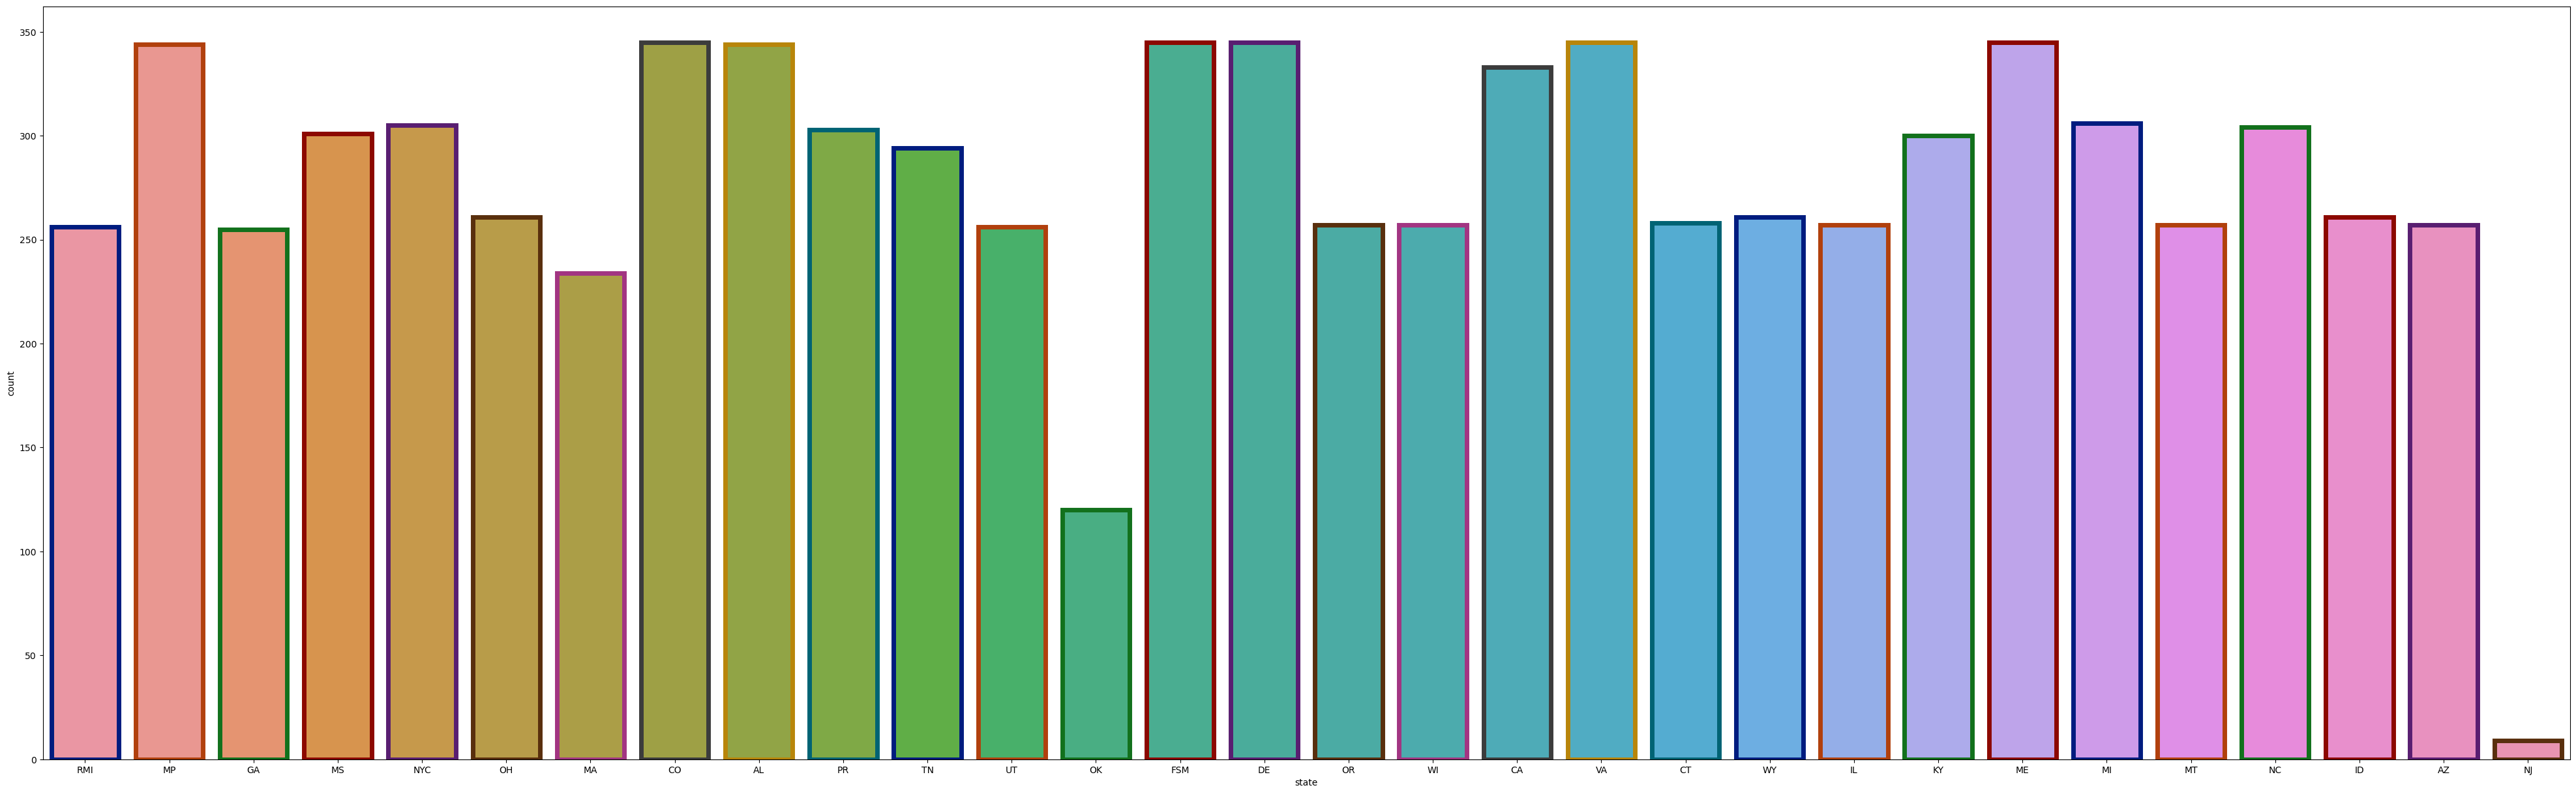

In [12]:
#testing to plot data on a graph
plt.figure(figsize=(50,15))
ax = sns.countplot(x="state", data=results_df,
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))
#plt.figure(figsize = (30,8))
#plt.bar(list(results_df['state']), list(results_df['conf_cases']), color ='maroon')

In [13]:
#parsing data to just include confirmed deaths and cases
df = results_df.drop(columns=['consent_deaths', 'consent_cases', 'created_at','pnew_death','new_death','prob_death', 'pnew_case', 'prob_cases', 'tot_cases', 'new_case','tot_death'])
df.head()

,submission_date,state,conf_cases,conf_death,year
5,2020-05-17,RMI,0.0,0.0,2020
23,2020-03-06,MP,0.0,0.0,2020
26,2020-07-20,GA,143697.0,3176.0,2020
38,2020-09-26,MS,90894.0,2931.0,2020
39,2020-05-10,NYC,185002.0,16217.0,2020


In [14]:
df.sort_values(['state'])

,submission_date,state,conf_cases,conf_death,year
48509,2020-04-03,AL,1544.0,64.0,2020
49626,2020-02-22,AL,0.0,0.0,2020
5691,2020-05-23,AL,14068.0,689.0,2020
5715,2020-10-21,AL,154196.0,3764.0,2020
49814,2020-02-21,AL,0.0,0.0,2020
...,...,...,...,...,...
22782,2020-09-05,WY,3386.0,42.0,2020
35461,2020-07-21,WY,1830.0,25.0,2020
39006,2020-09-02,WY,3311.0,41.0,2020
35434,2020-05-26,WY,648.0,13.0,2020


In [15]:
df_cases = df.groupby('state').agg({'conf_cases': 'first'}).reset_index()
df_cases

,state,conf_cases
0,AL,2523.0
1,AZ,205736.0
2,CA,139281.0
3,CO,6001.0
4,CT,31955.0
5,DE,23699.0
6,FSM,0.0
7,GA,143697.0
8,ID,105898.0
9,IL,220178.0


In [16]:
df = results_df.drop(columns=['submission_date', 'year'])
df_deaths = df.groupby('state').agg({'conf_death': 'first'})
df_deaths

,conf_death
state,
AL,112.0
AZ,5014.0
CA,4769.0
CO,250.0
CT,2294.0
DE,661.0
FSM,0.0
GA,3176.0
ID,1121.0


In [20]:
df.to_csv('output.csv', encoding = 'utf-8-sig') 
df_deaths.to_csv('statewise_deaths.csv', encoding = 'utf-8-sig')
df_cases.to_csv('statewise_cases.csv', encoding = 'utf-8-sig')